핑크팬더 님 자료

## 서울지역 - 편의점 시급

시급으로 본 서울지역 아르바이트 환경 분석에서 사용했던 자료 중 편의점에 해당하는 데이터입니다.

In [1]:
#-*- coding: utf-8 -*-
import pandas as pd
import matplotlib as plt
%matplotlib inline

### 편의점 시급 데이터

In [2]:
Hourly_wages = pd.read_csv('./data/convenient_store.csv')
Hourly_wages.head()

,area,company,hourly_wage,area1,area2,outlier,name
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25


In [3]:
Hourly_wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         177 non-null    object
 1   company      177 non-null    object
 2   hourly_wage  177 non-null    int64 
 3   area1        177 non-null    object
 4   area2        177 non-null    object
 5   outlier      177 non-null    int64 
 6   name         177 non-null    object
dtypes: int64(2), object(5)
memory usage: 9.8+ KB


### 시급 데이터 파악하기


시급 값이 있는 컬럼의 중간,표준편차,최소,25%,50%,75%, 최대값

In [4]:
Hourly_wages.describe()     #데이터 프레임에 숫자 컬럼에서 요약해 준다.

,hourly_wage,outlier
count,177.000000,177.0
mean,5787.627119,0.0
std,352.318646,0.0
min,5580.000000,0.0
25%,5580.000000,0.0
50%,5600.000000,0.0
75%,6000.000000,0.0
max,7500.000000,0.0


In [5]:
Hourly_wages.hourly_wage.describe()  # 특정 컬럼의 중간,표준편차,최소 값을 요약한다.

count     177.000000
mean     5787.627119
std       352.318646
min      5580.000000
25%      5580.000000
50%      5600.000000
75%      6000.000000
max      7500.000000
Name: hourly_wage, dtype: float64

시급이 6000원 이상인 데이터만 필터

In [3]:
#시급이 6000원 이상인 데이터
Hourly_wages[Hourly_wages.hourly_wage > 6000].describe()

,hourly_wage,outlier
count,25.000000,25.0
mean,6518.000000,0.0
std,343.923441,0.0
min,6100.000000,0.0
25%,6300.000000,0.0
50%,6500.000000,0.0
75%,6500.000000,0.0
max,7500.000000,0.0


In [4]:
# 마포구에 시급이 6000원 이상인 편의점
Hourly_wages[(Hourly_wages.area1 == '마포구') & (Hourly_wages.hourly_wage > 6000)]

,area,company,hourly_wage,area1,area2,outlier,name
72,마포구 동교동,세븐일레븐 마포홍익점,6500,마포구,동교동,0,7/11


조건식을 괄호로 묶고 `&, |, !` 논리연산자 묶어야!

In [8]:
# 편의점명, 시급, 체인명
tmp = Hourly_wages[Hourly_wages['area1'] == '마포구'][['company','hourly_wage','name']]
tmp.describe()

,hourly_wage
count,13.000000
mean,5763.076923
std,276.266315
min,5580.000000
25%,5580.000000
50%,5600.000000
75%,5900.000000
max,6500.000000


In [9]:
# 편의점이 세븐일레븐인 경우
tmp = Hourly_wages[Hourly_wages['company'].str.contains('세븐일레븐*')][['company','hourly_wage']]
tmp.describe()

,hourly_wage
count,123.000000
mean,5764.959350
std,331.576893
min,5580.000000
25%,5580.000000
50%,5600.000000
75%,5850.000000
max,7500.000000


In [10]:
# 편이점 이름에 CU가 있고 시급이 6000원 이상인 경우
tmp = Hourly_wages[ (Hourly_wages.company.str.contains('CU')) & ( Hourly_wages.hourly_wage > 6000)]
tmp.head()

,area,company,hourly_wage,area1,area2,outlier,name
143,강남구 신사동,CU 로데오점,6100,강남구,신사동,0,CU
145,강남구 논현1동,CUBE pc방,6500,강남구,논현1동,0,CU
151,금천구 독산동,CU 독산메이퀸점,6300,금천구,독산동,0,CU
152,금천구 가산동,"뚜레쥬르,CU,가산디폴리스점",6300,금천구,가산동,0,CU
160,서대문구 신촌동,BGF Retail CU 신촌세브란스병원점,6900,서대문구,신촌동,0,CU


### 데이터 정리하기

In [11]:
def more_than_6000(x):
    """6000 보단 크고 작은지 판단한다"""
    if x > 6000:
        return 1
    else:
        return 0

# 새로운 컬럼 'Seoul' 추가 
Hourly_wages['Seoul'] = 'in Seoul'
Hourly_wages['more_than_6000'] = Hourly_wages.hourly_wage.map(lambda x:more_than_6000(x))
Hourly_wages[Hourly_wages.more_than_6000 == 1].head()

,area,company,hourly_wage,area1,area2,outlier,name,Seoul,more_than_6000
13,영등포구 영등포동,gs25,6300,영등포구,영등포동,0,gs25,in Seoul,1
18,강남구 논현동,세븐일레븐 논현11호점,6200,강남구,논현동,0,7/11,in Seoul,1
29,강남구 논현동,세븐일레븐편의점,7500,강남구,논현동,0,7/11,in Seoul,1
30,강남구 청담동,세븐일레븐 청담그린점,6500,강남구,청담동,0,7/11,in Seoul,1
37,강서구 등촌동,세븐일레븐 서울호서대점,6600,강서구,등촌동,0,7/11,in Seoul,1


In [12]:
# 컬럼 중 '구' 와 시급 6000원 이상인 데이터셋트
tmp = Hourly_wages[Hourly_wages.more_than_6000 == 1][['area1','hourly_wage']]
tmp.head()

,area1,hourly_wage
13,영등포구,6300
18,강남구,6200
29,강남구,7500
30,강남구,6500
37,강서구,6600


In [13]:
# csv 출력
# data2.to_csv('data2.csv', index=False) 
#    - index=False: 행번호 제외

---

## 시급현황 그래프로 분석하기

In [27]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

# 폰트를 적재한다.
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif 'Ubuntu' in platform.platform() or 'Linux' in platform.platform():
    path = "/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif 'SuSE' in platform.platform():
    path = "/usr/share/fonts/truetype/NanumMyeongjo.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

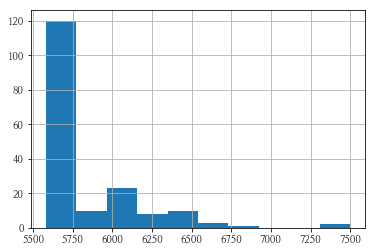

In [28]:
#
#   Histogram
# 
Hourly_wages.hourly_wage.hist(bins=10)
plt.show()

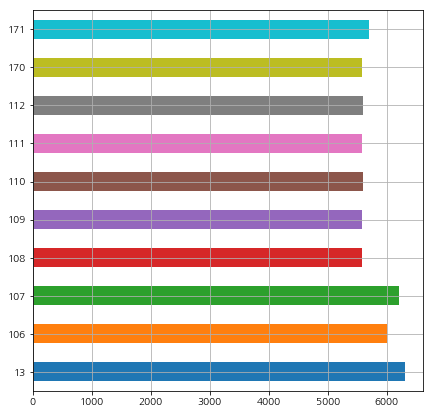

In [30]:
"""
    barh
"""
Hourly_wages[ Hourly_wages['area1'] == '영등포구' ].hourly_wage.plot( kind='barh', grid=True, figsize=(7,7))
plt.show()

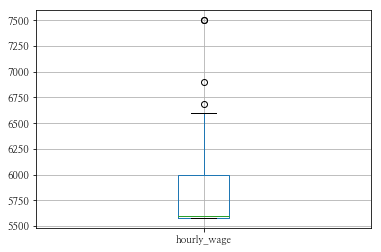

In [16]:
# Box plot
Hourly_wages.boxplot(column='hourly_wage')
plt.show()

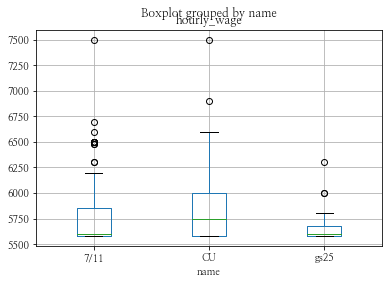

In [17]:
Hourly_wages.boxplot(column=['hourly_wage'], by='name')

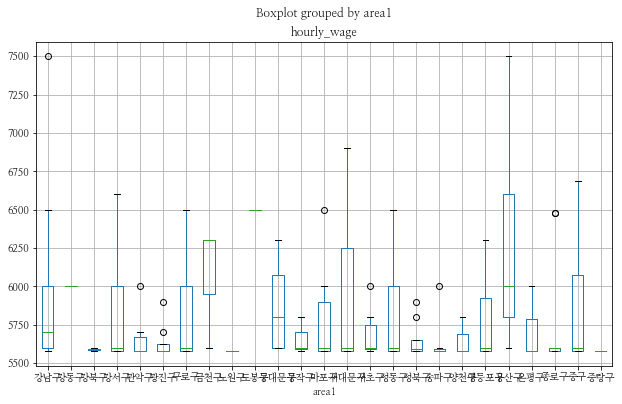

In [18]:
Hourly_wages.boxplot(column='hourly_wage', by='area1', figsize=(10,6))

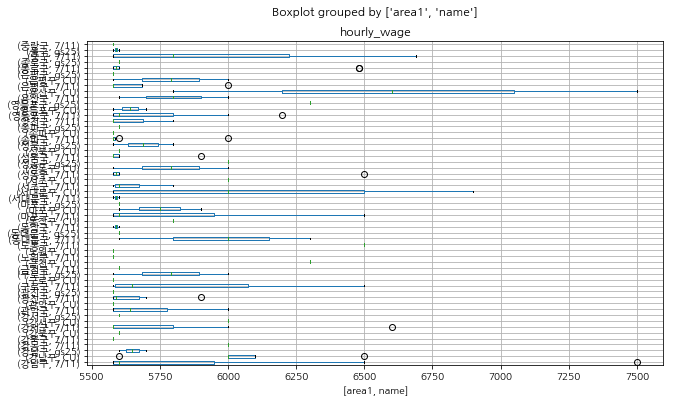

In [19]:
# 가로 박스 플로팅
plt.rc('font', family='NanumGothic') #폰트
Hourly_wages.boxplot(column='hourly_wage', by=['area1', 'name'], vert=False,  figsize=(10,6))